
* 1. 二维最大池化层和平均池化层</br>
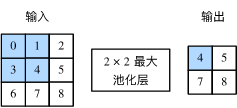</br>
$\begin{split}\max(0,1,3,4)=4,\\
\max(1,2,4,5)=5,\\
\max(3,4,6,7)=7,\\
\max(4,5,7,8)=8.\\\end{split}$
* 2. 填充和步幅
* 3. 多通道


In [1]:
import torch
from torch import nn
import dltools

def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i: i + p_h, j: j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
    return Y

In [2]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pool2d(X, (2, 2))

tensor([[4., 5.],
        [7., 8.]])

In [3]:
pool2d(X, (2, 2), 'avg')

tensor([[2., 3.],
        [5., 6.]])

In [4]:
# padding and stride
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [5]:
pool2d = nn.MaxPool2d(3)
pool2d(X)

tensor([[[[10.]]]])

In [6]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [7]:
# stride=(2, 3)：窗口将每次向右滑动三个元素位置，或者向下滑动两个元素位置
# padding=(0, 1)：表示在上下两个方向填充零行0，在左右两个方向各填充一列0
pool2d = nn.MaxPool2d((2, 3), stride=(2, 3), padding=(0, 1)) 
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [8]:
# 多个通道
X = torch.cat((X, X + 1), 1)
X


tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [9]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])